In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [152]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train, y_train)
X_train = scaler.transform(X_train)

In [164]:
class LogisticRegression:
    def __init__(self, lr=0.01, epochs=150):
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X, y):
        accuracies = []
        losses = []

        self._init_params(X)

        for i in range(self.epochs):
            linear_output = np.dot(X, self.weights)
            probabilities = self.sigmoid(linear_output)
            dw = self.compute_gradients(X, y, probabilities)
            self._update_params(dw)

            predictions = [1 if p > 0.5 else 0 for p in probabilities]
            loss = self.compute_loss(y, probabilities)
            accuracy = accuracy_score(y, predictions)
            losses.append(loss)
            accuracies.append(accuracy)

            if i % 100 == 0:
                print("Epoch {}/{}: loss: {}, acc: {}".format(i, self.epochs, loss, accuracy))

        return accuracies, losses
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights)
        probabilities = self.sigmoid(linear_output)
        return [1 if p > 0.5 else 0 for p in probabilities]
    
    def _init_params(self, X):
        self.weights = np.zeros(X.shape[1])
    
    def _update_params(self, dw):
        self.weights -= self.lr * dw

    def compute_gradients(self, X, y_true, y_pred):
        diff = y_pred - y_true
        dw = np.dot(X.T, diff) / len(y_true)
        return dw

    def compute_loss(self, y_true, y_pred):
        return np.sum([y * np.log(y_hat + 1e9) + (1-y)*np.log(1-y_hat + 1e9) for y, y_hat in zip(y_true, y_pred)]) / -len(y_true)

    def sigmoid(self, X):
        def sig(x):
            if x >= 0:
                z = np.exp(-x)
                return 1 / (1 + z)
            else:
                z = np.exp(x)
                return z / (1 + z)
        return np.array([sig(x) for x in X])

In [165]:
model = LogisticRegression(epochs=1000)
accuracies, losses = model.fit(X_train, y_train)

Epoch 1/1000: loss: -20.723265837456058, acc: 0.9246231155778895
Epoch 2/1000: loss: -20.72326583746538, acc: 0.9246231155778895
Epoch 3/1000: loss: -20.723265837474365, acc: 0.9246231155778895
Epoch 4/1000: loss: -20.723265837483016, acc: 0.9271356783919598
Epoch 5/1000: loss: -20.72326583749133, acc: 0.9271356783919598
Epoch 6/1000: loss: -20.72326583749932, acc: 0.9271356783919598
Epoch 7/1000: loss: -20.72326583750699, acc: 0.9271356783919598
Epoch 8/1000: loss: -20.723265837514347, acc: 0.9271356783919598
Epoch 9/1000: loss: -20.723265837521403, acc: 0.9271356783919598
Epoch 10/1000: loss: -20.723265837528185, acc: 0.9296482412060302
Epoch 11/1000: loss: -20.723265837534694, acc: 0.9296482412060302
Epoch 12/1000: loss: -20.723265837540946, acc: 0.9321608040201005
Epoch 13/1000: loss: -20.72326583754695, acc: 0.9321608040201005
Epoch 14/1000: loss: -20.723265837552724, acc: 0.9346733668341709
Epoch 15/1000: loss: -20.723265837558273, acc: 0.9371859296482412
Epoch 16/1000: loss: -20

Text(0.5, 1.0, 'Loss value over training set')

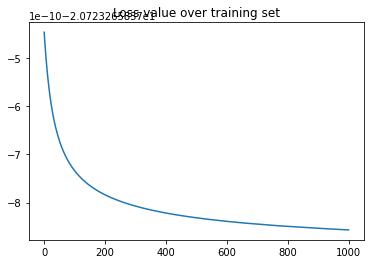

In [160]:
plt.plot(range(model.epochs), losses)
plt.title("Loss value over training set")

Text(0.5, 1.0, 'Accuracy value over training set')

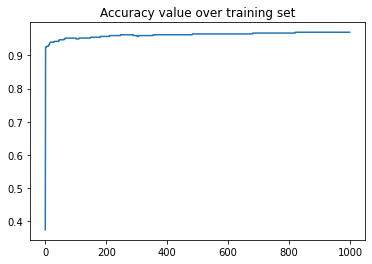

In [161]:
plt.plot(range(model.epochs), accuracies)
plt.title("Accuracy value over training set")

In [162]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.3684210526315789


In [163]:
from sklearn.linear_model import LogisticRegression as logic

lr = logic()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.3684210526315789